# In-class Linear Regression Demo

Adjusted by Adi Bronshtein and Jeff Hale

## Learning Objectives:
- Identify a Target Variable
- Explore the Scikit-learn linear regression API: `.fit`/`.predict`
- Visualize our predictions
- Find our residuals
- Compute MSE
- Compute and interpret R-squared

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll use a dataset from [this website](http://users.stat.ufl.edu/~winner/datasets.html) at the University of Florida.

## Single Linear Regression:

In [15]:
# LSD and Math Scores
# http://users.stat.ufl.edu/~winner/data/lsd.txt
df_lsd = pd.read_csv(
    'http://users.stat.ufl.edu/~winner/data/lsd.dat',
    names=['LSD','Math'], sep='\s+',
    header=None
)

In [16]:
# check out the DataFrame
df_lsd.head()

,LSD,Math
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [17]:
# get the info() on the data
df_lsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSD     7 non-null      float64
 1   Math    7 non-null      float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [18]:
# shape of the data
df_lsd.shape

(7, 2)

In [19]:
# make summary/descriptive statistics of the data
df_lsd.describe()

,LSD,Math
count,7.000000,7.000000
mean,4.332857,50.087143
std,1.935413,18.610854
min,1.170000,29.970000
25%,3.115000,35.195000
50%,4.690000,45.650000
75%,5.915000,62.835000
max,6.410000,78.930000


In [22]:
# Any missing values
df_lsd.isnull().sum()

LSD     0
Math    0
dtype: int64

In [23]:
# create x and y
X = df_lsd['LSD']
y = df_lsd['Math']


In [24]:
X

0    1.17
1    2.97
2    3.26
3    4.69
4    5.83
5    6.00
6    6.41
Name: LSD, dtype: float64

In [25]:
y

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: Math, dtype: float64

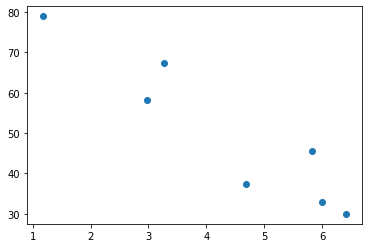

In [26]:
# make a scatter plot of x and y
plt.scatter(X, y)

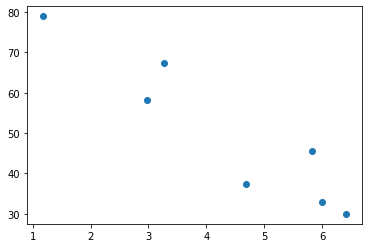

In [27]:
plt.scatter(df_lsd['LSD'], df_lsd['Math'])

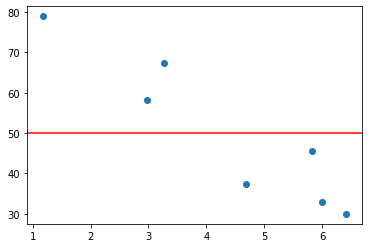

In [31]:
# Add mean of `y` to your plot as a horizontal line
plt.scatter(X, y)

plt.axhline(y.mean(), c='r')

# plt.plot([X.min(), X.max()], [y.mean(), y.mean()]);

In [33]:
# get the average math score
# np.mean(y)
y.mean()

50.08714285714286

In [34]:
# show the type of X
type(X)

pandas.core.series.Series

In [35]:
X

0    1.17
1    2.97
2    3.26
3    4.69
4    5.83
5    6.00
6    6.41
Name: LSD, dtype: float64

In [36]:
# get values of X only
X.values                       # you will aslso see .values - but .to_numpy() is best practice

array([1.17, 2.97, 3.26, 4.69, 5.83, 6.  , 6.41])

In [37]:
type(X.values)

numpy.ndarray

In [40]:
X.to_numpy()

numpy.ndarray

In [42]:
type(X)

pandas.core.series.Series

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html

In [49]:
# Annoying transformation need if you only have one feature. 
# No idea why they won't fix it.

X = X.to_numpy().reshape(-1,1)



In [ ]:
# verify X and y look like how you think they should

In [50]:
X.shape

(7, 1)

Stack Overflow thread - [What does -1 mean in numpy reshape?](https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape)

In [ ]:
# Get the type of x after reshape


In [43]:
# import linear regression class from sklearn
from sklearn.linear_model import LinearRegression

In [45]:
# Create a linear regression object from the class
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
type(model)

sklearn.linear_model._base.LinearRegression

In [51]:
# Fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# What is the coefficient?
model.coef_

array([-9.00946642])

In [53]:
# What is the intercept?
model.intercept_

89.12387376799308

In [56]:
# Create the prediction 
y_pred = model.predict(X)
y_pred

array([78.58279806, 62.36575851, 59.75301325, 46.86947628, 36.59868457,
       35.06707528, 31.37319405])

In [57]:
y_pred = model.intercept_ + (model.coef_ * X)
y_pred

array([[78.58279806],
       [62.36575851],
       [59.75301325],
       [46.86947628],
       [36.59868457],
       [35.06707528],
       [31.37319405]])

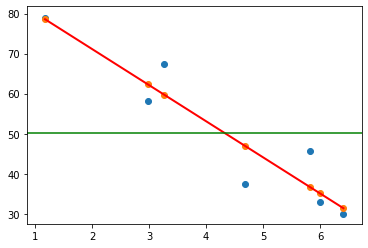

In [60]:
# Let's plot the prediction line
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', linewidth=2.0)
plt.axhline(y.mean(), c='g')
plt.scatter(X, y_pred);

In [ ]:
# Let's make predictions on our data
y_pred = # we did this both ways above



In [ ]:
# notice we pass a nested list or can reshape using np.array([-10].reshape(1,-1))

In [62]:
y

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: Math, dtype: float64

In [64]:
y_pred.ravel()

array([78.58279806, 62.36575851, 59.75301325, 46.86947628, 36.59868457,
       35.06707528, 31.37319405])

In [67]:
y_pred.shape

(7, 1)

In [65]:
y_pred.ravel().shape

(7,)

In [71]:
# Calculate residuals with those predicted values:
residuals = y_pred.ravel() - y
residuals

0   -0.347202
1    4.165759
2   -7.716987
3    9.399476
4   -9.051315
5    2.147075
6    1.403194
Name: Math, dtype: float64

In [ ]:
# Make the residuals a DataFrame for pretty reading 😀

In [74]:
type(residuals)

pandas.core.series.Series

In [76]:
pd.DataFrame(residuals, columns=['Math'])

,Math
0,-0.347202
1,4.165759
2,-7.716987
3,9.399476
4,-9.051315
5,2.147075
6,1.403194


In [79]:
df_y_and_y_pred = pd.DataFrame({'y_pred': y_pred.ravel(), 'y': y})
df_y_and_y_pred

,y_pred,y
0,78.582798,78.93
1,62.365759,58.20
2,59.753013,67.47
3,46.869476,37.47
4,36.598685,45.65
5,35.067075,32.92
6,31.373194,29.97


In [ ]:
# Plotting the residuals with the null model (average score), the X


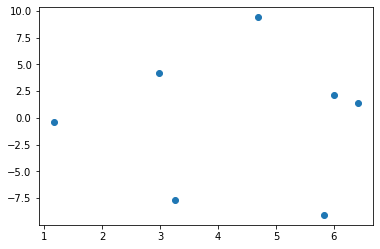

In [80]:
plt.scatter(X, residuals)

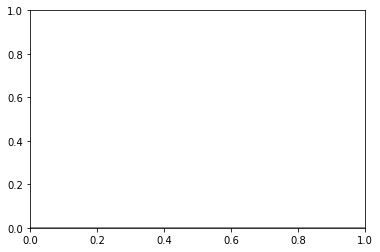

In [87]:
plt.axhline()

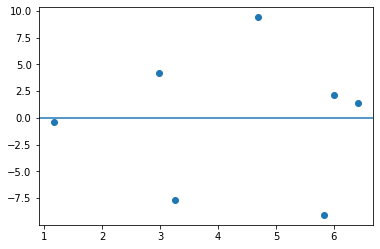

In [85]:
plt.axhline(residuals.mean())
plt.scatter(X, residuals)

(array([2., 0., 0., 0., 1., 1., 1., 1., 0., 1.]),
 array([-9.05131543, -7.20623626, -5.36115709, -3.51607792, -1.67099875,
         0.17408042,  2.01915959,  3.86423877,  5.70931794,  7.55439711,
         9.39947628]),
 <a list of 10 Patch objects>)

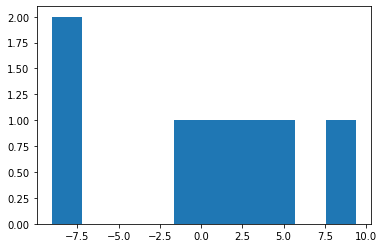

In [88]:
# Plot the residuals by themselves.
# Are they normally distributed? 
plt.hist(residuals)

In [89]:
# import MSE
from sklearn.metrics import mean_squared_error

In [91]:
# Let's get the MSE
mse = mean_squared_error(y, y_pred)
mse

36.26876125852443

In [93]:
# RMSE for the Linear Regression model
rmse = np.sqrt(mse)
rmse

6.022355125573751

In [95]:
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

6.022355125573751

In [96]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

6.022355125573751

Create the baseline of a linear regression model just the mean!

Check out this handy NumPy function to help `np.ones_like()` 😀.

In [ ]:
# Make an array full of ones

In [97]:
np.ones_like(y)

array([1., 1., 1., 1., 1., 1., 1.])

In [98]:
ones_array = np.ones_like(y)

In [99]:
ones_array.shape

(7,)

In [ ]:
# use np.ones_like() as the first step to make an array filled 
# with the mean value (for our baseline predictions)

In [101]:
y_baseline = np.ones_like(y) * y.mean()
y_baseline

array([50.08714286, 50.08714286, 50.08714286, 50.08714286, 50.08714286,
       50.08714286, 50.08714286])

In [103]:
# MSE of the baseline (null model)
mse_baseline = mean_squared_error(y, y_baseline)
mse_baseline

296.8833346938776

In [104]:
# RMSE of the baseline (null model)
np.sqrt(mse_baseline)

17.23030280331363

In [105]:
# What is the R-squared score?
model.score(X, y)

0.8778349707775889

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(y, y_baseline)

0.0

In [108]:
r2_score(y, y_pred)

0.8778349707775889

In [109]:
from sklearn import metrics

In [ ]:
metrics.r2_score()

$R^{2}$ is the percentage of explained variance - how much of the variance in our target variable `y` we can explain with our model (using our feature matrix). 

Note, this is not not the adjusted $R^{2}$. "The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance." [Source](https://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables)